<ipython-input-1-2d4a415b2f1b>:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


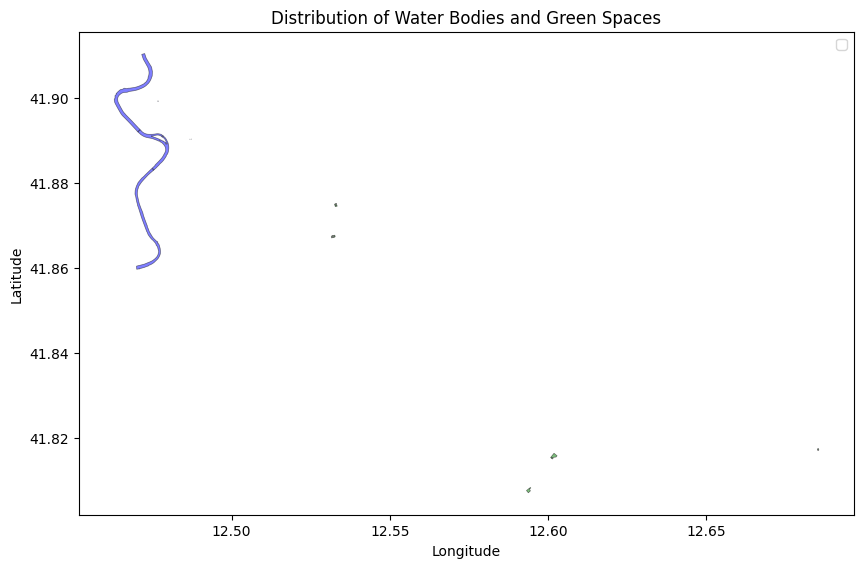

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON files
water_bodies = gpd.read_file('/content/waterboby.geojson')
green_spaces = gpd.read_file('/content/greenspace.geojson')

# Plotting water bodies
fig, ax = plt.subplots(figsize=(10, 10))
water_bodies.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black', linewidth=0.5, label='Water Bodies')

# Plotting green spaces
green_spaces.plot(ax=ax, color='green', alpha=0.5, edgecolor='black', linewidth=0.5, label='Green Spaces')

# Add legend and labels
ax.legend()
ax.set_title('Distribution of Water Bodies and Green Spaces')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


<ipython-input-2-ffbfc17b379f>:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_bodies['area'] = water_bodies.geometry.area
<ipython-input-2-ffbfc17b379f>:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  green_spaces['area'] = green_spaces.geometry.area


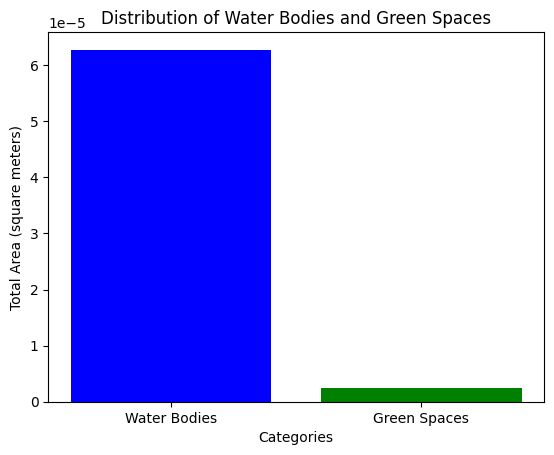

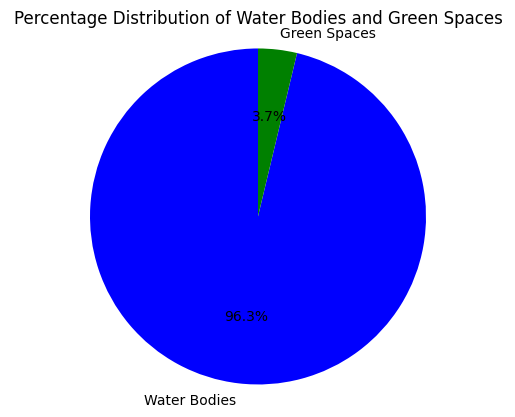

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON datasets
water_bodies = gpd.read_file('/content/waterboby.geojson')
green_spaces = gpd.read_file('/content/greenspace.geojson')

# Calculate area of each feature (assuming your data has an 'area' column)
water_bodies['area'] = water_bodies.geometry.area
green_spaces['area'] = green_spaces.geometry.area

# Calculate total area for water bodies and green spaces
total_water_area = water_bodies['area'].sum()
total_green_area = green_spaces['area'].sum()

# Calculate the percentage of total area for each category
water_percentage = (total_water_area / (total_water_area + total_green_area)) * 100
green_percentage = (total_green_area / (total_water_area + total_green_area)) * 100

# Bar chart
categories = ['Water Bodies', 'Green Spaces']
areas = [total_water_area, total_green_area]

plt.bar(categories, areas, color=['blue', 'green'])
plt.title('Distribution of Water Bodies and Green Spaces')
plt.xlabel('Categories')
plt.ylabel('Total Area (square meters)')
plt.show()

# Pie chart
labels = ['Water Bodies', 'Green Spaces']
sizes = [water_percentage, green_percentage]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Percentage Distribution of Water Bodies and Green Spaces')
plt.show()


In [3]:
# Install required libraries
!pip install geopandas
!pip install folium

# Import libraries
import geopandas as gpd
import folium

# Step 1: Upload the GeoJSON file to your Colab environment
# - Click the "Files" tab on the left-hand side.
# - Use the "Upload" button to upload your 'busStop.geojson', 'railway.geojson', and 'tram.geojson' files.

# Step 2: Load GeoJSON files for bus stops, metro stations, and tram lines
water_bodies = gpd.read_file('/content/waterboby.geojson')
green_spaces = gpd.read_file('/content/greenspace.geojson')


# Function to assess efficiency and coverage
def assess_efficiency_coverage(data, category):
    # Calculate total count
    total_count = len(data)

    # Visualize the data on a map
    map_data = folium.Map(location=[data.geometry.centroid.y.mean(), data.geometry.centroid.x.mean()], zoom_start=12)

    # Add GeoJSON data to the map
    folium.GeoJson(data).add_to(map_data)

    # Display the map
    display(map_data)

    print(f'Total {category} count: {total_count}')

# Assess efficiency and coverage for each dataset
assess_efficiency_coverage(water_bodies, 'water_bodies')
assess_efficiency_coverage(green_spaces, 'green_spaces')



<ipython-input-3-5ca0172b69cd>:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_data = folium.Map(location=[data.geometry.centroid.y.mean(), data.geometry.centroid.x.mean()], zoom_start=12)


Total water_bodies count: 4


<ipython-input-3-5ca0172b69cd>:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_data = folium.Map(location=[data.geometry.centroid.y.mean(), data.geometry.centroid.x.mean()], zoom_start=12)


Total green_spaces count: 5
